Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import linear, relu
import matplotlib.pyplot as plt

Importing Dataset

In [2]:
x = np.load("data/X.npy")
y = np.load("data/y.npy")
train_x = x
train_y = y
test_x = x[::10]
test_y = y[::10]

Visualising Dataset (Selecting 64 Random Images And Their Corresponding Label)

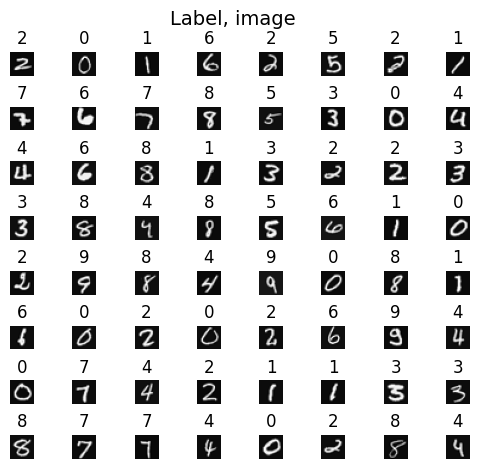

In [7]:
def display_digit(X):
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((20,20)).T
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

m, n = train_x.shape
selected_indices = []

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
widgvis(fig)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    selected_indices.append(random_index)
    X_random_reshaped = train_x[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(train_y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

Constructing Our Model

In [3]:
tf.random.set_seed(1234)
model = Sequential(
    [
        InputLayer(shape=(400,)),
        Dense(25, activation='relu', name='L1'),
        Dense(15, activation='relu', name='L2'),
        Dense(10, activation='linear', name='L3'),
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

Training Our Model (The More Iteration It Does, The More Accurate It Becomes)

In [4]:
history = model.fit(
    train_x, train_y,
    epochs=500
)

Epoch 1/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8590
Epoch 2/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6056
Epoch 3/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3955
Epoch 4/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3237
Epoch 5/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2838
Epoch 6/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2547
Epoch 7/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2314
Epoch 8/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2132
Epoch 9/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1975
Epoch 10/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1846
Epoch 11/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1728
Epoch 12/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1624
Epoch 13/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1533
Epoch 14/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1443
Epoch 15/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1

Visualising Our Loss Function Value

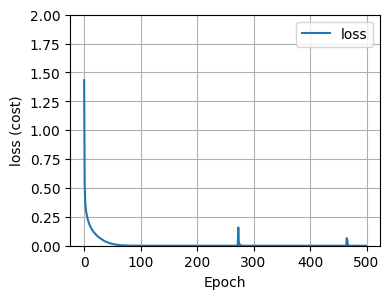

In [5]:
fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

Prediction

In [6]:
error_count = 0
for index in range (500):
  test_input = test_x[index]
  test_output = test_y[index]
  prediction = model.predict(test_input.reshape(1,400))
  if test_output != np.argmax(prediction):
    print("Error Detected!")
    print(f" Predicted Digit: {np.argmax(prediction)}")
    print(f" Correct Digit: {test_output[0]}")
    print(f" Digit Image:")
    display_digit(test_x[index])
    error_count += 1
print("Errors :", error_count)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━